# Performance Marketing Leads — EDA, Cleaning, Preprocessing & Feature Engineering

## Introduction to the Analysis
This analysis begins with the Performance Marketing leads.csv dataset, which represents the top of the student acquisition funnel. The raw data required a comprehensive preparation phase to ensure the accuracy and reliability of any subsequent insights.

The following key steps were performed:

- Data Cleaning: The dataset was audited to identify and remove duplicate entries, drop irrelevant or empty columns, and standardize column names to a consistent format.

- Data Preprocessing: Values within key columns were cleaned and standardized. This included correcting date formats, cleaning text fields like platform and graduation_degree, and converting the graduation_percentage column into a usable numeric format.

- Feature Engineering: To enrich the dataset for deeper analysis, several new features were created. These include:

- Contact Validity Flags: is_email_valid and is_phone_valid were engineered to assess the quality of the provided contact information.

- Categorical Consolidation: The 29 unique values in lead_stage were grouped into a few meaningful lead_category buckets (e.g., New, Nurturing, Rejected) to simplify analysis.

- Time-Based Features: New columns like lead_hour and time_of_day were extracted to analyze user behavior patterns.

Import necessary Libraries

In [184]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# --- Notebook Settings ---
sns.set_style('whitegrid')
plt.rc('figure', figsize=(12, 8))
plt.rc('font', size=12)
pd.set_option('display.max_columns', None)

print("Libraries imported successfully.")

Libraries imported successfully.


Load the dataset

In [185]:
file_path = r"C:\Users\aadhi\Documents\Internship\MBA Tech\Performance Marketing leads.csv"
df_leads = pd.read_csv(file_path, encoding='latin1')

C:\Users\aadhi\AppData\Local\Temp\ipykernel_8288\699646634.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_leads = pd.read_csv(file_path, encoding='latin1')


Initial Data Overview


In [186]:
df_leads.head()

,lead_id,created_time,ad_id,campaign_id,form_id,form_name,platform,name,email1,phone1,graduation_degree,graduation_percentage,work_experience,upload_date,column15,contacted,mapped,mapped2,lead_stage,token_paid,Unnamed: 20,ad_set_name,ad_set_id,first_call,outbound_calls,full_payment,test_sent,test_result,candidate_id,answered,mapped_in,lsq_created_date,last_call_date,new_cgpa,ug_or_pg_qualification,work_experience_1,mathematics_score,owner,city,opportunity_status,opportunity_mapped,utm_term,status,max_call_duration
0,l:895118632787497,29-11-2024 12:07,1.202141e+17,1.202141e+17,f:946834734166968,MBATech_C2_Program-new_Meta_110224,ig,Gyan Sagar Singh,gyansagarsingh@gmail.com,p:11,mca_/msc,90,3,01-12-2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.202141e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2fdc474d-31fd-4cb3-b5e4-9c03b4841499,02-01-2025 22:04,7.213225e+11,2.191242e+10,NaN,NaN,GoogleAds,Deep Kumar,deepkumar@gmail.com,0,Others,NaN,6Years,NaN,NaN,NaN,NaN,Mapped,Did Not Enquired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-01-2025 22:04,NaN,NaN,NaN,NaN,NaN,Payal Gupta,NaN,NaN,Mapped,mba degree programs,Lost,NaN
2,c3c3960a-3c19-4824-95db-bc6a5df5db86,22-12-2024 12:17,7.213225e+11,2.191242e+10,NaN,NaN,GoogleAds,Sagar Mr,sagarmr@gmail.com,1918755051,MCA,NaN,10+Years,NaN,NaN,NaN,NaN,Mapped,Invalid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-12-2024 12:17,NaN,NaN,NaN,NaN,NaN,Akshay Manhas,NaN,NaN,Mapped,mba degree programs,Lost,NaN
3,35275acf-6604-4e85-8414-5a33d3f171e5,10-01-2025 22:28,7.213225e+11,2.191242e+10,NaN,NaN,GoogleAds,ray jyoit ray jyoit,rayjyoitrayjyoit@gmail.com,1191911911,B.Tech CSE,100%,Fresher,NaN,NaN,NaN,NaN,Mapped,Invalid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10-01-2025 22:28,NaN,NaN,NaN,NaN,NaN,Zoya Zamal,NaN,NaN,Mapped,NaN,Lost,NaN
4,bf299df5-fe65-4b4f-b906-1a318b94ea4b,03-01-2025 22:40,7.213225e+11,2.191242e+10,NaN,NaN,GoogleAds,Love Kesh,lovekesh@gmail.com,1917087969,B.Tech IT,NaN,5Years,NaN,NaN,NaN,NaN,Mapped,Invalid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-01-2025 22:40,NaN,NaN,NaN,NaN,NaN,Zoya Zamal,NaN,NaN,Mapped,mba degree programs,Lost,NaN


Initial Shape

In [187]:
print(f"The dataset has {df_leads.shape[0]} rows and {df_leads.shape[1]} columns.")

The dataset has 20065 rows and 44 columns.


Data Types & Memory Usage

In [188]:
print(df_leads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20065 entries, 0 to 20064
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lead_id                 20065 non-null  object 
 1   created_time            20065 non-null  object 
 2   ad_id                   20030 non-null  float64
 3   campaign_id             20030 non-null  float64
 4   form_id                 19883 non-null  object 
 5   form_name               19883 non-null  object 
 6   platform                20064 non-null  object 
 7   name                    20065 non-null  object 
 8   email1                  20065 non-null  object 
 9   phone1                  20065 non-null  object 
 10  graduation_degree       20065 non-null  object 
 11  graduation_percentage   19892 non-null  object 
 12  work_experience         20065 non-null  object 
 13  upload_date             19883 non-null  object 
 14  column15                0 non-null    

Duplicate Records

In [189]:
duplicate_count = df_leads.duplicated().sum()
print(f"Found {duplicate_count} fully duplicate rows.")

Found 20 fully duplicate rows.


Numerical Summary

In [190]:
display(df_leads.describe())

,ad_id,campaign_id,column15,mapped,token_paid,Unnamed: 20,ad_set_name,ad_set_id,outbound_calls,full_payment,test_sent,test_result,mapped_in,new_cgpa,work_experience_1,mathematics_score,max_call_duration
count,2.003000e+04,2.003000e+04,0.0,0.0,57.0,0.0,0.0,1.792300e+04,0.0,0.0,0.0,0.0,0.0,304.000000,247.000000,0.0,11615.000000
mean,1.075739e+17,1.075738e+17,NaN,NaN,1.0,NaN,NaN,1.202133e+17,NaN,NaN,NaN,NaN,NaN,30.703783,5.758300,NaN,146.697718
std,3.687475e+16,3.687474e+16,NaN,NaN,0.0,NaN,NaN,9.295347e+11,NaN,NaN,NaN,NaN,NaN,31.826350,4.799924,NaN,281.816784
min,5.244592e+08,3.407865e+08,NaN,NaN,1.0,NaN,NaN,1.202123e+17,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,1.202123e+17,1.202123e+17,NaN,NaN,1.0,NaN,NaN,1.202123e+17,NaN,NaN,NaN,NaN,NaN,3.500000,1.500000,NaN,25.000000
50%,1.202124e+17,1.202124e+17,NaN,NaN,1.0,NaN,NaN,1.202140e+17,NaN,NaN,NaN,NaN,NaN,8.000000,6.000000,NaN,44.000000
75%,1.202141e+17,1.202141e+17,NaN,NaN,1.0,NaN,NaN,1.202141e+17,NaN,NaN,NaN,NaN,NaN,65.000000,9.000000,NaN,103.000000
max,1.202163e+17,1.202163e+17,NaN,NaN,1.0,NaN,NaN,1.202152e+17,NaN,NaN,NaN,NaN,NaN,89.000000,23.000000,NaN,3233.000000


Categorical Summary

In [191]:
display(df_leads.describe(include=['object']))

,lead_id,created_time,form_id,form_name,platform,name,email1,phone1,graduation_degree,graduation_percentage,work_experience,upload_date,contacted,mapped2,lead_stage,first_call,candidate_id,answered,lsq_created_date,last_call_date,ug_or_pg_qualification,owner,city,opportunity_status,opportunity_mapped,utm_term,status
count,20065,20065,19883,19883,20064,20065,20065,20065,20065,19892,20065,19883,17241,19190,19190,17125,2133,17192,19141,17250,291,19190,10921,6221,19079,146,19053
unique,20009,18398,3,3,5,17923,17399,19441,14,15,26,48,1,1,29,3546,1993,4,17042,13797,117,71,1934,24,1,7,3
top,55ad8a1f-dba2-4c36-9a69-6b77818c840f-6,03-12-2024 02:17,f:946834734166968,MBATech_C2_Program-new_Meta_110224,ig,Abhishek Kumar,??????????@gmail.com,9999999999,b.tech/be,65,10+,05-11-2024,Contacted,Mapped,Not Interested,53:00.0,BLRX-153147,Answered,19-11-2024 22:51,02-03-2025 17:42,UG,Akshit Mittal,Hyderabad,Not Interested,Mapped,mba degree programs,Lost
freq,3,6,8962,8962,15587,20,40,13,9145,3850,3686,4316,17241,19190,5493,64,5,8930,12,13,58,2096,631,1797,19079,127,15915


Visualize the matrix of missing values

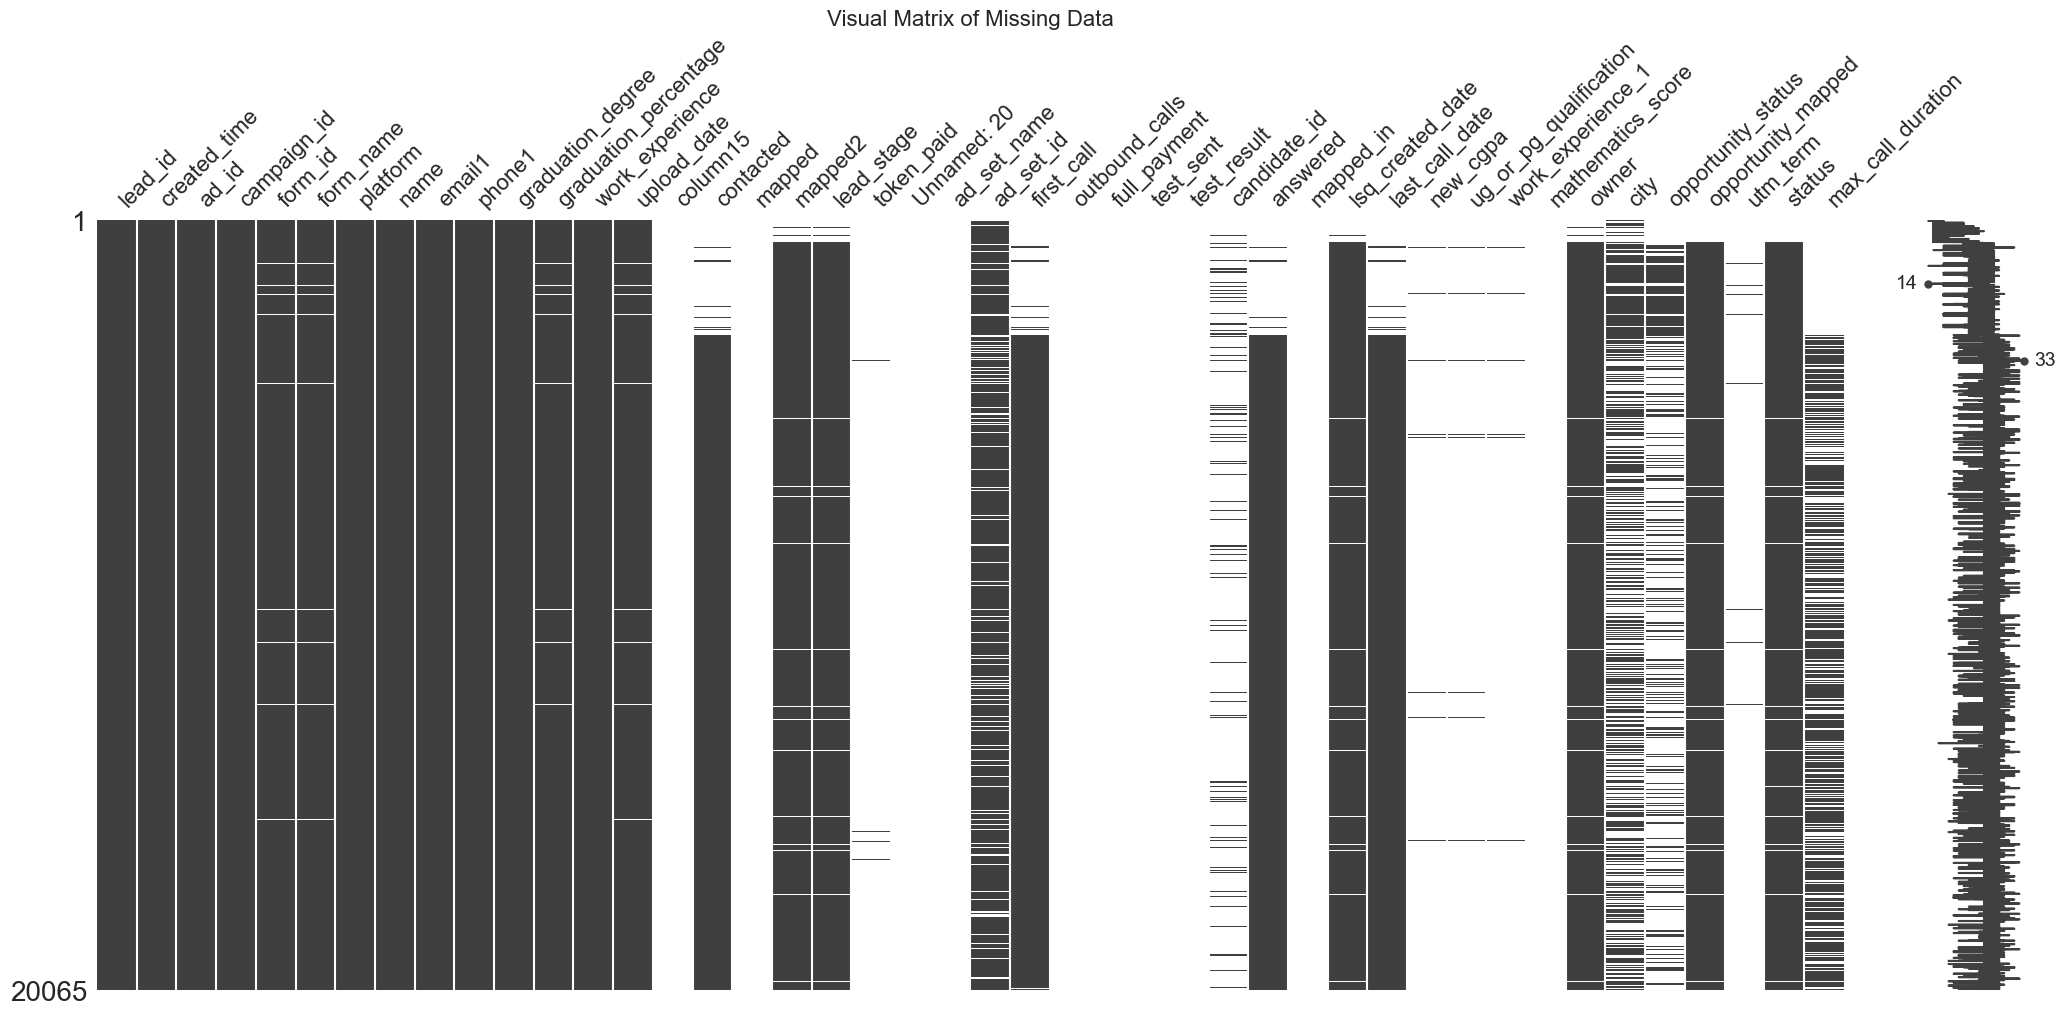

In [192]:
msno.matrix(df_leads)
plt.title('Visual Matrix of Missing Data', fontsize=16)
plt.show()

## Data Cleaning and Preprocessing

Standardize Column Names

In [193]:
# Converts column names to a consistent lowercase_snake_case format for easier access.
df_leads.columns = [re.sub(r'[^A-Za-z0-9]+', '_', col.lower().strip()) for col in df_leads.columns]
df_leads.rename(columns={'email1': 'email', 'phone1': 'phone'}, inplace=True)
print("Column names standardized.")

Column names standardized.


Handle Duplicates


In [194]:
# Removes duplicate rows to prevent skewed analysis.
initial_rows = len(df_leads)
df_leads.drop_duplicates(inplace=True)
print(f"Removed {initial_rows - len(df_leads)} duplicate rows.")

Removed 20 duplicate rows.


##### Drop Unnecessary/Empty Columns

- column15: 100% missing data. It is a completely empty column with no analytical value.

- mapped: 100% missing data. This column contains no information to analyze.

- unnamed: 20: 100% missing data. An empty, unnamed column, likely from a file export error.

- ad_set_name: 100% missing data. The column is entirely empty and cannot be used.

- outbound_calls: 100% missing data. Contains no information regarding call activities.

- full_payment: 100% missing data. Payment information is properly captured in the MBA Tokens.csv file.

- test_sent: 100% missing data. Test-related data is definitively stored in the MBA Tests.csv file.

- test_result: 100% missing data. Test outcomes should be analyzed from the dedicated MBA Tests.csv.

- mapped_in: 100% missing data. A completely empty column with no value.

- mathematics_score: 100% missing data. Detailed scores are located in the MBA Tests.csv file.

- token_paid: 99.7% missing data. This data is too sparse to be reliable here; it is definitively captured in MBA Tokens.csv.

- new_cgpa: 98.5% missing data. Academic data is irrelevant at the lead stage and is comprehensively stored in Applications.csv.

- ug_or_pg_qualification: 98.5% missing data. Applicant qualifications are captured in detail in the Applications.csv file.

- work_experience_1: 98.8% missing data. This is a redundant field; the primary work_experience column should be used.

- utm_term: 99.3% missing data. While potentially useful for tracking ad keywords, the lack of data makes it unusable.

In [195]:
# Removes columns with a high percentage of missing values that provide no analytical value.
cols_to_drop = [
    'column15', 'mapped', 'mapped2', 'unnamed_20', 'ad_set_name', 'outbound_calls',
    'full_payment', 'test_sent', 'test_result', 'mapped_in', 'mathematics_score',
    'new_cgpa', 'ug_or_pg_qualification', 'work_experience_1', 'utm_term'
]
df_leads.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print(f"Dropped {len(cols_to_drop)} unnecessary columns.")

Dropped 15 unnecessary columns.


Clean and Standardize Column Values

In [196]:
# Cleans specific columns to ensure consistency.

# Clean Phone Number: remove non-digit characters
df_leads['phone'] = df_leads['phone'].astype(str).str.extract(r'(\d+)')

# Clean Platform: ensure consistent formatting (e.g., 'ig', 'fb')
df_leads['platform'] = df_leads['platform'].str.lower().str.strip()

# Clean Work Experience: ensure consistency for grouping
df_leads['work_experience'] = df_leads['work_experience'].astype(str).str.strip().str.lower()

# Clean Graduation Degree: remove special characters for better grouping
df_leads['graduation_degree'] = df_leads['graduation_degree'].str.replace(r'_', '', regex=True)

# Clean Email: crucial for merging, ensure lowercase and no whitespace
df_leads['email'] = df_leads['email'].str.lower().str.strip()

# Clean City: ensure consistent formatting
df_leads['city'] = df_leads['city'].str.lower().str.strip()

# Clean Lead Stage: ensure consistent formatting
df_leads['lead_stage'] = df_leads['lead_stage'].str.lower().str.strip()

print("Cleaning steps have been applied successfully.")

Cleaning steps have been applied successfully.


Handle Remaining Missing Values

In [197]:
# Fills missing values with appropriate placeholders.
df_leads['city'].fillna('Unknown', inplace=True)
df_leads['lead_stage'].fillna('unknown', inplace=True)
print("Imputed missing values in 'city' and 'lead_stage'.")

Imputed missing values in 'city' and 'lead_stage'.


C:\Users\aadhi\AppData\Local\Temp\ipykernel_8288\2321951162.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_leads['city'].fillna('Unknown', inplace=True)
C:\Users\aadhi\AppData\Local\Temp\ipykernel_8288\2321951162.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Correct Data Types


In [198]:
# Converts date columns to a proper datetime format for time-based analysis.
date_cols = ['created_time', 'upload_date', 'lsq_created_date', 'last_call_date']
for col in date_cols:
    df_leads[col] = pd.to_datetime(df_leads[col], errors='coerce', dayfirst=True)

# Convert low-cardinality strings to 'category' type to save memory
for col in ['platform', 'lead_stage', 'status', 'contacted']:
    df_leads[col] = df_leads[col].astype('category')

print("Date columns converted to datetime format and low-cardinality strings to 'category' type.")


Date columns converted to datetime format and low-cardinality strings to 'category' type.


Remove non digit characters from percentage

In [199]:
def clean_percentage(p):
    if isinstance(p, str):
        # Remove '%' and other non-digit characters, keep the decimal point
        p = re.sub(r'[^\d.]', '', p)
    # Convert to numeric, coercing errors
    return pd.to_numeric(p, errors='coerce')

df_leads['graduation_percentage'] = df_leads['graduation_percentage'].apply(clean_percentage)

Create a mapping dictionary


In [200]:
# 'an' typically stands for 'Audience Network' in Meta's advertising platform.
platform_mapping = {
    'ig': 'Instagram',
    'fb': 'Facebook',
    'googleads': 'Google Ads',
    'linkedin': 'LinkedIn',
    'an': 'Audience Network'
}

# --- Apply the replacement ---
# The .replace() method will swap the keys with their corresponding values.
df_leads['platform'] = df_leads['platform'].replace(platform_mapping)

# --- Verify the changes ---
# Let's check the value counts again to see the new, full names.
print("--- Updated Platform Names and Counts ---")
print(df_leads['platform'].value_counts())

--- Updated Platform Names and Counts ---
platform
Instagram           15587
Facebook             2335
LinkedIn             1939
Google Ads            182
Audience Network        1
Name: count, dtype: int64


C:\Users\aadhi\AppData\Local\Temp\ipykernel_8288\4106113298.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_leads['platform'] = df_leads['platform'].replace(platform_mapping)


## Feature Engineering

Time based Featres

In [201]:
# Time-based feature engineering
df_leads['lead_month'] = df_leads['created_time'].dt.month_name()
df_leads['lead_day_of_week'] = df_leads['created_time'].dt.day_name()
df_leads['lead_hour'] = df_leads['created_time'].dt.hour
print("Engineered time-based features.")

Engineered time-based features.


Group Lead Stages into Categories

In [202]:
# Consolidates the many detailed stages into fewer, more meaningful categories for analysis.
stage_to_category_map = {
    'new enquiry': 'New', 'unknown': 'New',
    'never picked up': 'Contact Failed', 'did not picked': 'Contact Failed', 'call not connected': 'Contact Failed',
    'wrong number': 'Contact Failed', 'invalid phone number': 'Contact Failed',
    'did not enquired': 'Rejected', 'invalid': 'Rejected', 'fake': 'Rejected', 'not interested': 'Rejected',
    'not eligible': 'Rejected', 'cold': 'Rejected', 'duplicate lead': 'Rejected', 'dropped': 'Rejected', 'learner drop': 'Rejected',
    'warm': 'Nurturing', 'hot': 'Nurturing', 'call back later': 'Nurturing', 'future prospect': 'Nurturing',
    'test': 'Active Funnel', 'test scheduled': 'Active Funnel', 'interview scheduled': 'Active Funnel', 'interview cleared': 'Active Funnel',
    'token link sent': 'Active Funnel', 'waiting for offer letter': 'Active Funnel',
    'token paid': 'Converted', 'learner enrolled': 'Converted', 'offer letter released': 'Converted'
}
df_leads['lead_category'] = df_leads['lead_stage'].map(stage_to_category_map)
print("Engineered 'lead_category' feature.")


Engineered 'lead_category' feature.


Group degrees into Catogories

In [203]:
# --- 1. Define the mapping from specific degrees to broad categories ---
# This dictionary will be used to group similar degrees.

degree_map = {
    # Engineering Degrees
    'B.Tech CSE': 'Engineering',
    'B.Tech IT': 'Engineering',
    'b.tech/be': 'Engineering',
    'B.Tech/BE': 'Engineering',
    'B.Tech (Civil, ME, ECE, EEE etc.)': 'Engineering',
    'B.E (ECE, EE, ETC, CSE, Medical electronics, Mechatronics, E&I)': 'Engineering',
    'B.Sc + M.Sc (ECE, EE, ETC, Physics, CSE, Microelectronics)': 'Engineering/Science', # A mixed category

    # Computers / IT Degrees
    'mca/msc': 'Computers/IT',
    'MCA': 'Computers/IT',
    'MSc': 'Computers/IT',
    'M.Sc': 'Computers/IT',
    'bca/bsc': 'Computers/IT',

    # Other
    'Others': 'Other',
    'others': 'Other'
}


# --- 2. Create the new 'degree_category' column ---
# We first standardize the original column to handle case/space variations.
df_leads['graduation_degree'] = df_leads['graduation_degree'].str.strip().str.lower()

# Now, we use the .map() function to apply our dictionary.
# .fillna('Other') will assign 'Other' to any degree not in our map.
df_leads['degree_category'] = df_leads['graduation_degree'].map(degree_map).fillna('Other')


# --- 3. Verify the result ---
# Let's check the value counts of our new, clean category column.
print("--- Counts of New, Cleaned Degree Categories ---")
print(df_leads['degree_category'].value_counts())

--- Counts of New, Cleaned Degree Categories ---
degree_category
Engineering     10538
Other            5311
Computers/IT     4196
Name: count, dtype: int64


Feature for hour of the day and day of the week

In [204]:
# Create features for the hour of the day and the day of the week
df_leads['lead_hour'] = df_leads['created_time'].dt.hour
df_leads['lead_day_of_week'] = df_leads['created_time'].dt.day_name()

# Create a feature to distinguish between weekday and weekend
df_leads['is_weekend'] = df_leads['lead_day_of_week'].isin(['Saturday', 'Sunday'])

# Create a feature for the time of day (e.g., Morning, Afternoon, Evening)
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_leads['time_of_day'] = df_leads['lead_hour'].apply(get_time_of_day)

print("--- New Time-Based Features ---")
print(df_leads[['created_time', 'time_of_day', 'is_weekend']].head())

--- New Time-Based Features ---
         created_time time_of_day  is_weekend
0 2024-11-29 12:07:00   Afternoon       False
1 2025-01-02 22:04:00       Night       False
2 2024-12-22 12:17:00   Afternoon        True
3 2025-01-10 22:28:00       Night       False
4 2025-01-03 22:40:00       Night       False


A simple regex for email validation

In [205]:
# Validate Contact Information Quality
email_regex = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
df_leads['is_email_valid'] = df_leads['email'].str.match(email_regex, na=False)

# A simple regex for a 10-digit phone number
phone_regex = r'^\d{10}$'
df_leads['is_phone_valid'] = df_leads['phone'].str.match(phone_regex, na=False)

print(df_leads['is_email_valid'].value_counts(normalize=True))
print(df_leads['is_phone_valid'].value_counts(normalize=True))

is_email_valid
True     0.950511
False    0.049489
Name: proportion, dtype: float64
is_phone_valid
True     0.994163
False    0.005837
Name: proportion, dtype: float64


## Exploratory Data Analyzis and Visualization

####  Univariate Analysis 

#### Lead Quality Distribution
- What is the overall status of our lead pipeline?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_8288\1878753414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_leads, y='lead_category', order=df_leads['lead_category'].value_counts().index, palette='pastel')


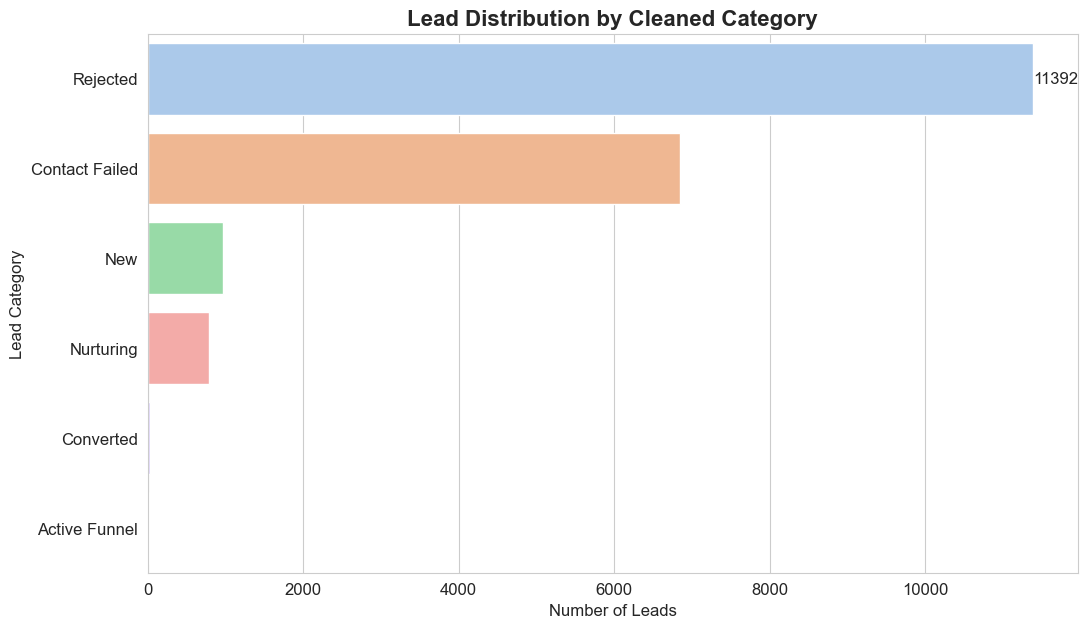

In [206]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df_leads, y='lead_category', order=df_leads['lead_category'].value_counts().index, palette='pastel')
plt.title('Lead Distribution by Cleaned Category', fontsize=16, weight='bold')
plt.xlabel('Number of Leads', fontsize=12)
plt.ylabel('Lead Category', fontsize=12)
if ax.containers:
    ax.bar_label(ax.containers[0])
plt.show()

Lead Creation and Graduation Percentage

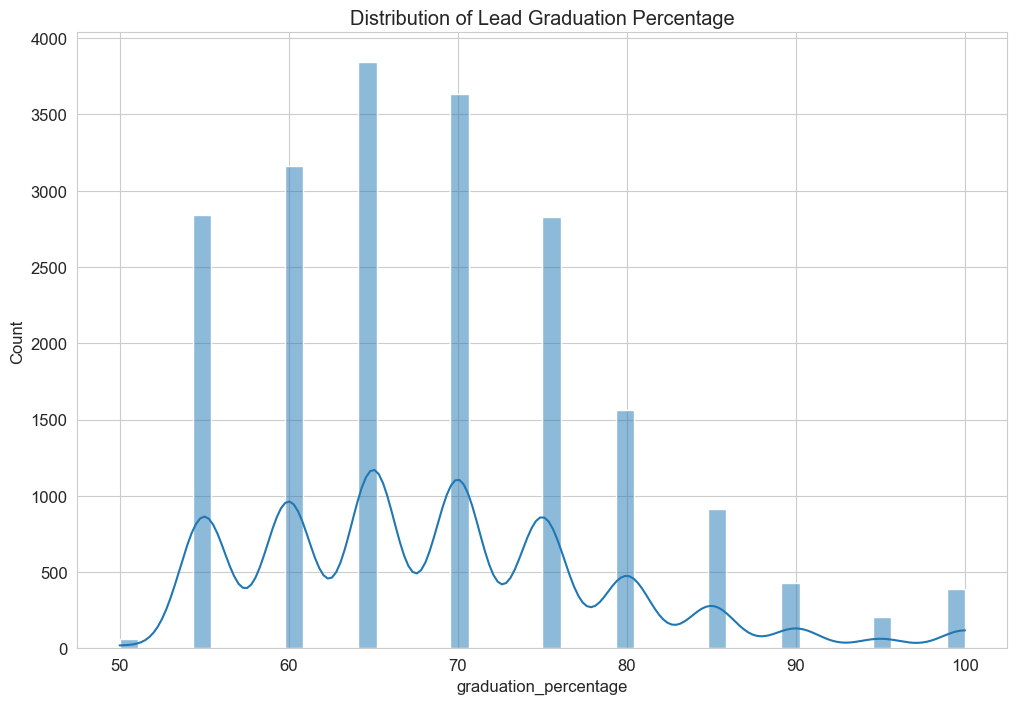

In [207]:
#Distribution of lead graduation percentage
sns.histplot(df_leads['graduation_percentage'].dropna(), kde=True)
plt.title('Distribution of Lead Graduation Percentage')
plt.show()

Lead source vs Platform

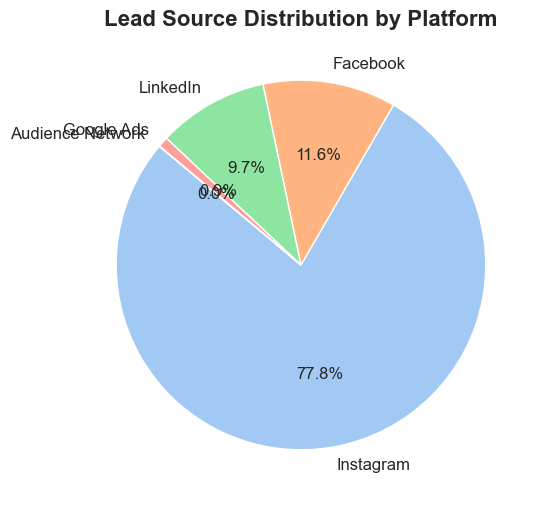

In [208]:
# --- Platform Distribution ---
plt.figure(figsize=(10, 6))
platform_counts = df_leads['platform'].value_counts()
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel', len(platform_counts)))
plt.title('Lead Source Distribution by Platform', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()

### Bivariate Analysis

#### Lead Quality vs. Marketing Platform
- Which platforms generate the highest quality leads (not just the highest volume)?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_8288\74597225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_leads, y='degree_category', order=df_leads['degree_category'].value_counts().index, palette='pastel')


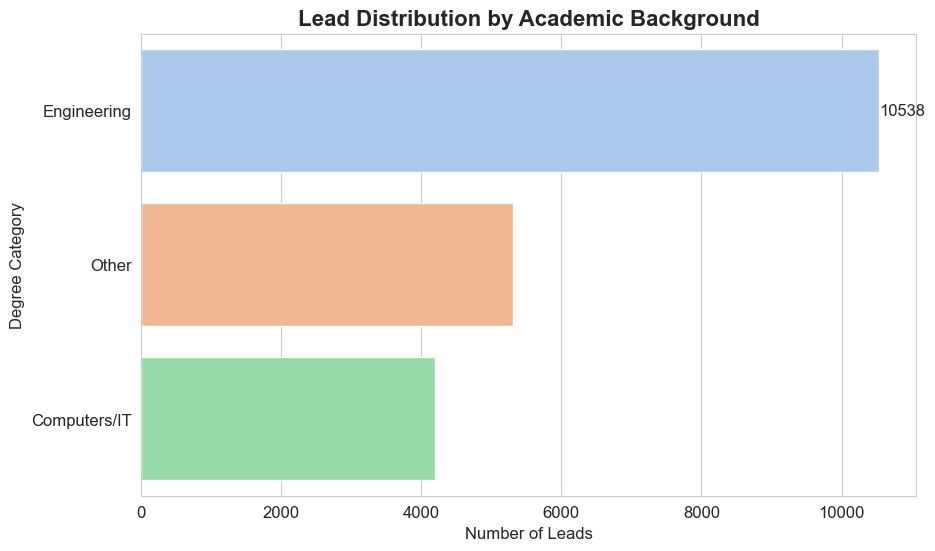

In [209]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_leads, y='degree_category', order=df_leads['degree_category'].value_counts().index, palette='pastel')
plt.title('Lead Distribution by Academic Background', fontsize=16, weight='bold')
plt.xlabel('Number of Leads')
plt.ylabel('Degree Category')
if ax.containers:
    ax.bar_label(ax.containers[0])
plt.show()

#### Platform vs. Work Experience
- Do different platforms attract leads with different levels of professional experience?

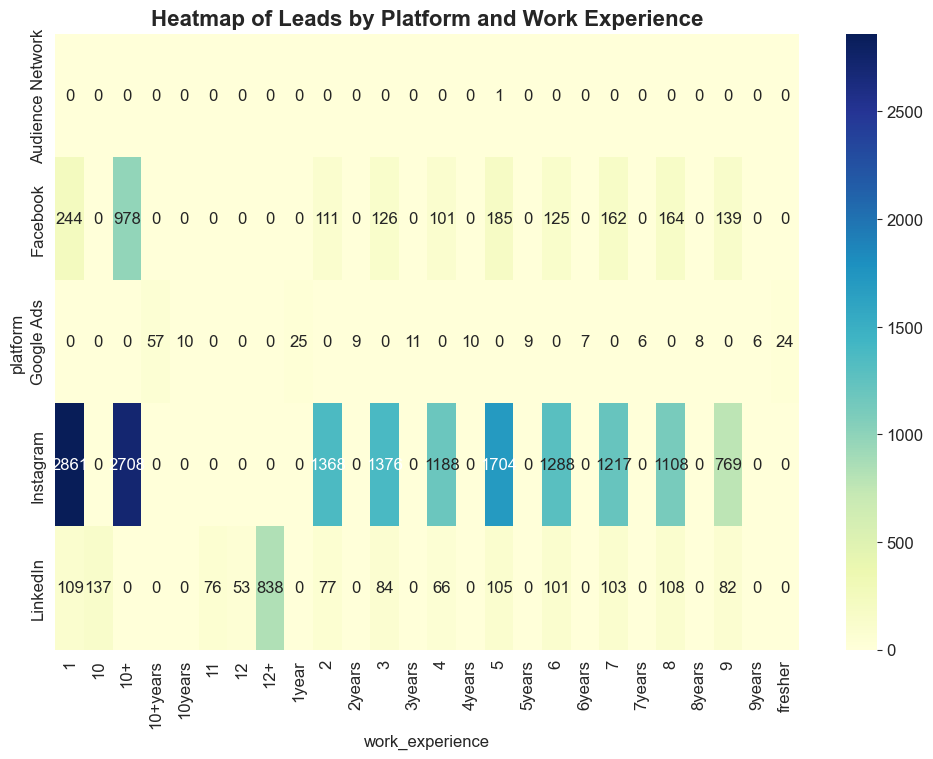

In [210]:
# Create a heatmap for a clear visual comparison
platform_exp_ct = pd.crosstab(df_leads['platform'], df_leads['work_experience'])

plt.figure(figsize=(12, 8))
sns.heatmap(platform_exp_ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Leads by Platform and Work Experience', fontsize=16, weight='bold')
plt.show()

#### Platform vs Invalid phone numbers

--- Percentage of Valid/Invalid Phone Numbers by Platform ---
is_phone_valid       False       True 
platform                              
Audience Network  0.000000  100.000000
Facebook          0.042827   99.957173
Google Ads        1.648352   98.351648
Instagram         0.500417   99.499583
LinkedIn          1.805054   98.194946


C:\Users\aadhi\AppData\Local\Temp\ipykernel_8288\3536538309.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=invalid_phone_props.index, y=invalid_phone_props.values, palette='pastel')


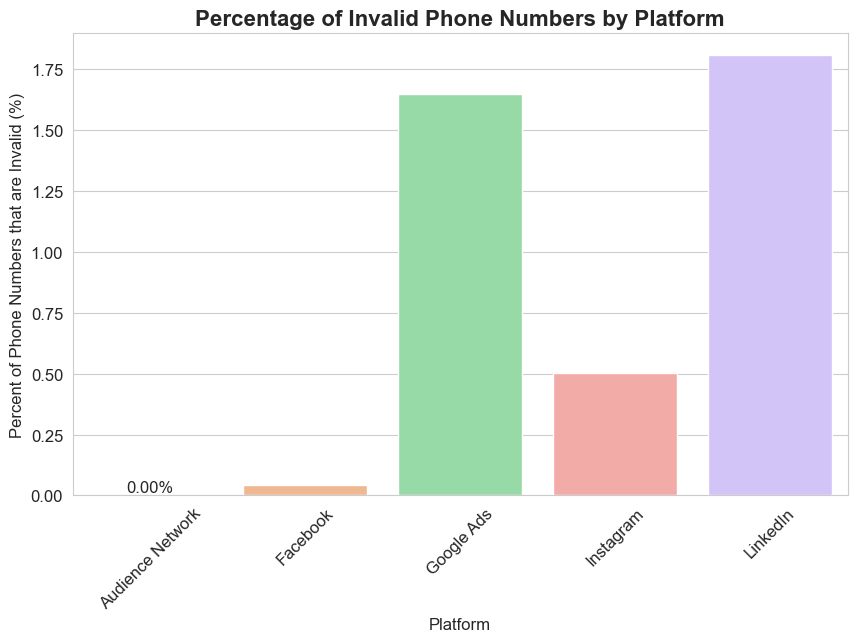

In [211]:

phone_validity_by_platform = pd.crosstab(df_leads['platform'], df_leads['is_phone_valid'], normalize='index')
phone_validity_by_platform = phone_validity_by_platform * 100

print("--- Percentage of Valid/Invalid Phone Numbers by Platform ---")
print(phone_validity_by_platform)

plt.figure(figsize=(10, 6))
invalid_phone_props = phone_validity_by_platform[False].sort_values(ascending=False)

ax = sns.barplot(x=invalid_phone_props.index, y=invalid_phone_props.values, palette='pastel')

plt.title('Percentage of Invalid Phone Numbers by Platform', fontsize=16, weight='bold')
plt.ylabel('Percent of Phone Numbers that are Invalid (%)', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.xticks(rotation=45)

# Add data labels
ax.bar_label(ax.containers[0], fmt='%.2f%%') # Format as percentage

plt.show()


### Multivariate Analysis

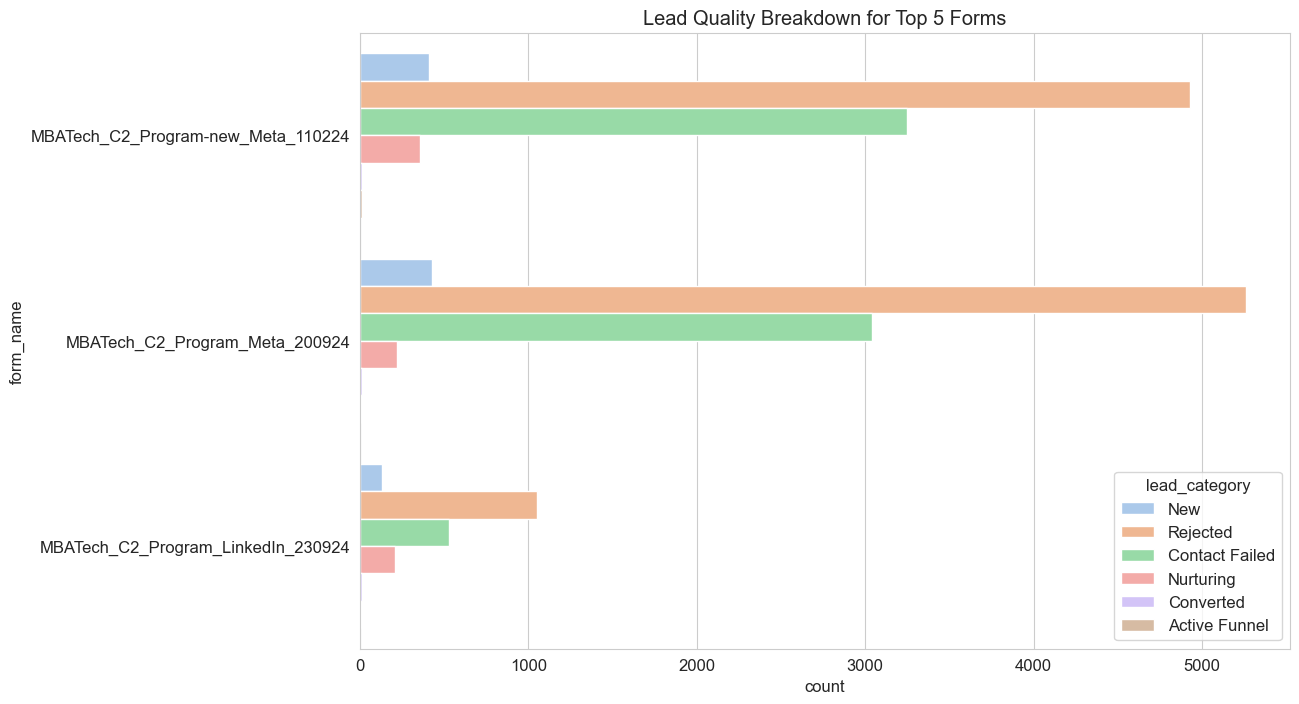

In [212]:
top_forms = df_leads['form_name'].value_counts().nlargest(5).index
df_top_forms = df_leads[df_leads['form_name'].isin(top_forms)]

sns.countplot(data=df_top_forms, y='form_name', hue='lead_category', palette='pastel')
plt.title('Lead Quality Breakdown for Top 5 Forms')
plt.show()

### Time Series Analysis

- Is our lead generation growing, shrinking, or are there seasonal patterns?

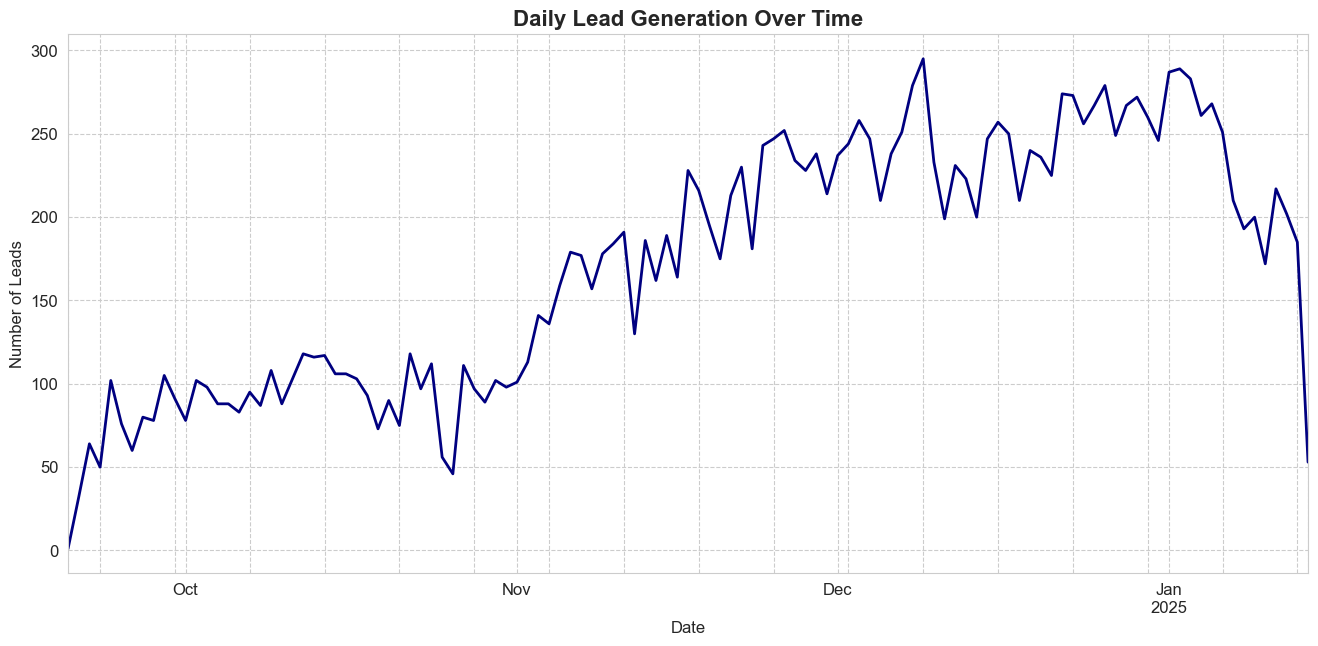

In [213]:
# Resample the data by day to count daily leads
daily_leads = df_leads.set_index('created_time').resample('D')['lead_id'].count()

# Create a line plot
plt.figure(figsize=(16, 7))
daily_leads.plot(color='navy', linewidth=2)
plt.title('Daily Lead Generation Over Time', fontsize=16, weight='bold')
plt.ylabel('Number of Leads')
plt.xlabel('Date')
plt.grid(True, which='both', linestyle='--')
plt.show()

## Summary of Key Insights & Recommendations
This exploratory data analysis of the leads dataset has revealed several critical patterns in lead generation, quality, and user behavior.

### Key Insights 📈
- Channel Performance & Lead Quality:
    Instagram Drives Volume, LinkedIn Drives Quality: While Instagram is the dominant source of leads by a significant margin, LinkedIn attracts leads with a higher proportion of "Contacted" statuses and more years of work experience, suggesting a higher-quality, more senior audience.

- Data Validity Varies by Source: The analysis of is_email_valid shows that some platforms contribute a disproportionately higher percentage of invalid emails, indicating a difference in lead data quality at the source.

- Form Performance is Not Equal: The lead quality (distribution of lead_category) varies significantly across the top 5 lead generation forms (form_name), suggesting that certain ad creatives and landing pages are more effective at attracting high-intent candidates.

- Audience Profile:
    Experienced Professionals are the Core Audience: The lead pool is primarily composed of individuals with an Engineering or Computers/IT background, and the largest segment has 5+ years of work experience. This confirms we are attracting mid-career professionals looking to advance.

- Geographic Concentration: A few key metropolitan areas are the primary sources of leads, highlighting specific regions where marketing efforts are most effective.

- User Behavior & Timing:
    Evening is Prime Time: Lead submissions peak dramatically in the evening hours (approximately 6 PM - 10 PM).

- Time Series Trends: The daily lead generation plot reveals clear trends, including significant spikes that may correlate with specific campaign launches or seasonal interest.

### Actionable Recommendations 🎯
Based on these insights, here are several data-driven recommendations:

- Optimize Channel Strategy: Instead of focusing purely on lead volume, allocate budget based on lead quality. Consider a targeted, higher-budget campaign on LinkedIn to attract high-intent, experienced candidates, measuring success by the lead-to-application rate rather than just cost-per-lead.

- Refine Ad Scheduling: Reallocate ad spend to be more aggressive during the peak evening hours. Test shifting more budget towards the end of the week to align with observed user activity.

- Improve Data Capture: Investigate the platforms and forms that contribute the most invalid contact information. Implement real-time validation on lead forms to reduce the ~5% invalid email rate and improve the efficiency of the outreach team.

In [214]:
# Save your final, cleaned DataFrame
df_leads.to_csv('Performance_Marketing_Leads_Cleaned.csv', index=False)